***Data cleaning and preprocessing***


In [31]:
# Importing the necessary libraries
import pandas as pd

# Loading the datasets
customers_df = pd.read_csv('/content/customers.csv')
orders_df = pd.read_csv('/content/orders.csv')
products_df = pd.read_csv('/content/products.csv')
sales_df = pd.read_csv('/content/sales.csv')

In [ ]:
# Assessing the data for cleaning
# Checking for missing values and duplicates in each dataframe, and observing data types

# Missing values
missing_values = {
    "customers_df": customers_df.isnull().sum(),
    "orders_df": orders_df.isnull().sum(),
    "products_df": products_df.isnull().sum(),
    "sales_df": sales_df.isnull().sum()
}

# Duplicates
duplicates = {
    "customers_df": customers_df.duplicated().sum(),
    "orders_df": orders_df.duplicated().sum(),
    "products_df": products_df.duplicated().sum(),
    "sales_df": sales_df.duplicated().sum()
}

# Data types
data_types = {
    "customers_df": customers_df.dtypes,
    "orders_df": orders_df.dtypes,
    "products_df": products_df.dtypes,
    "sales_df": sales_df.dtypes
}

missing_values, duplicates, data_types



In [ ]:
# Example: Convert 'order_date' and 'delivery_date' in orders_df to datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df['delivery_date'] = pd.to_datetime(orders_df['delivery_date'])
print(orders_df.dtypes)

***(EDA) Exploratory Data Analysis***

In [30]:


# Merging datasets for a comprehensive analysis
# Merge orders with customers
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

# Merge sales with products
sales_products_df = pd.merge(sales_df, products_df, left_on='product_id', right_on='product_ID', how='left')

# Merge the above with orders to get complete sales data
full_sales_data = pd.merge(sales_products_df, orders_customers_df, on='order_id', how='left')

# Renaming columns for clarity after noticing duplicates during analysis
full_sales_data.rename(columns={'quantity_x': 'quantity_sold', 'quantity_y': 'product_quantity'}, inplace=True)

# Insights calculation
# Total Revenue
total_revenue = full_sales_data['total_price'].sum()

# Number of Unique Customers
unique_customers = full_sales_data['customer_id'].nunique()

# Number of Unique Products Sold
unique_products_sold = full_sales_data['product_id'].nunique()

# Top 3 Best Selling Products (by quantity sold)
top_selling_products = full_sales_data.groupby('product_name')['quantity_sold'].sum().nlargest(10)

# Average Order Value
average_order_value = full_sales_data.groupby('order_id')['total_price'].sum().mean()

# Gender Distribution among Customers
gender_distribution = customers_df['gender'].value_counts(normalize=True) * 100

# Average Age of Customers
average_age = customers_df['age'].mean()

# Find the age with the highest frequency and its count
max_frequency_age = age_frequency.idxmax()
max_frequency_count = age_frequency.max()

# Displaying the insights
insights = {
    "total_revenue": total_revenue,
    "unique_customers": unique_customers,
    "unique_products_sold": unique_products_sold,
    "top_selling_products": top_selling_products,
    "average_order_value": average_order_value,
    "gender_distribution": gender_distribution,
    "average_age": average_age,
    "age_with_highest_frequency": (max_frequency_age, max_frequency_count)
}

# Printing insights for verification
print(insights)


{'total_revenue': 1031800, 'unique_customers': 616, 'unique_products_sold': 1233, 'top_selling_products': product_name
Denim              527
Joggers            334
Pleated            308
Casual Slim Fit    306
Shearling          302
Relaxed Leg        301
Trench Coat        299
Puffer             298
Bomber             297
Chambray           290
Name: quantity_sold, dtype: int64, 'average_order_value': 1039.0735146022155, 'gender_distribution': Male           14.3
Non-binary     13.1
Polygender     12.8
Genderqueer    12.7
Genderfluid    12.2
Bigender       12.0
Female         11.5
Agender        11.4
Name: gender, dtype: float64, 'average_age': 49.86, 'age_with_highest_frequency': (59, 25)}


***Data Visualization***

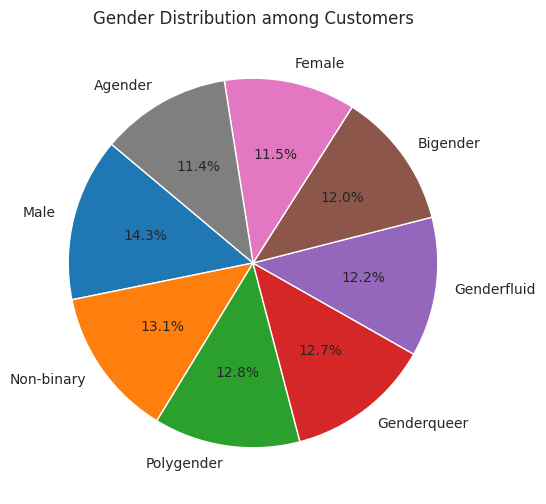

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Gender Distribution among Customers
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution among Customers')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts

# Show the first plot and prepare for the next
plt.show()

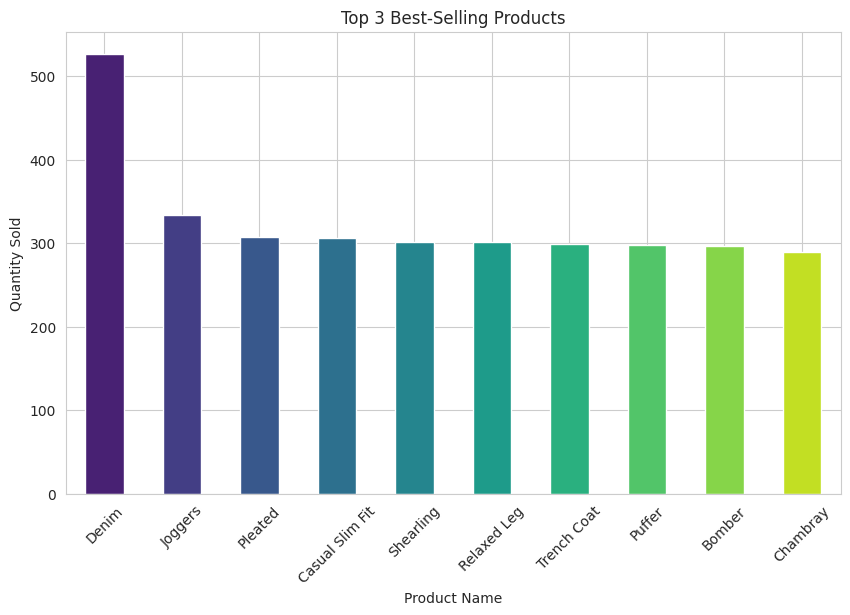

In [14]:


# 2. Top 3 Best-Selling Products Visualization
plt.figure(figsize=(10, 6))
top_selling_products_corrected.plot(kind='bar', color=sns.color_palette("viridis", len(top_selling_products_corrected)))
plt.title('Top 3 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)  # Rotate labels to make them readable

# Show the bar chart for top-selling products
plt.show()


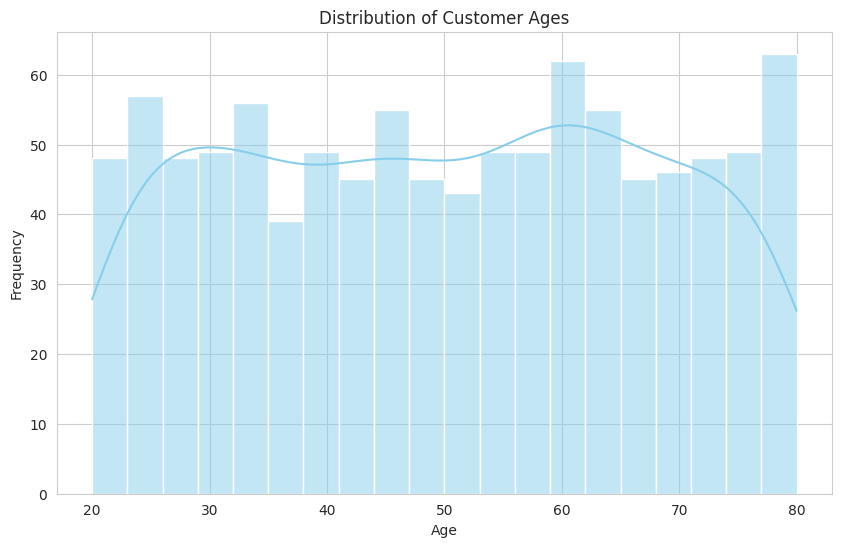

In [17]:
# 3. Distribution of Customer Ages Visualization
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the histogram for customer age distribution
plt.show()

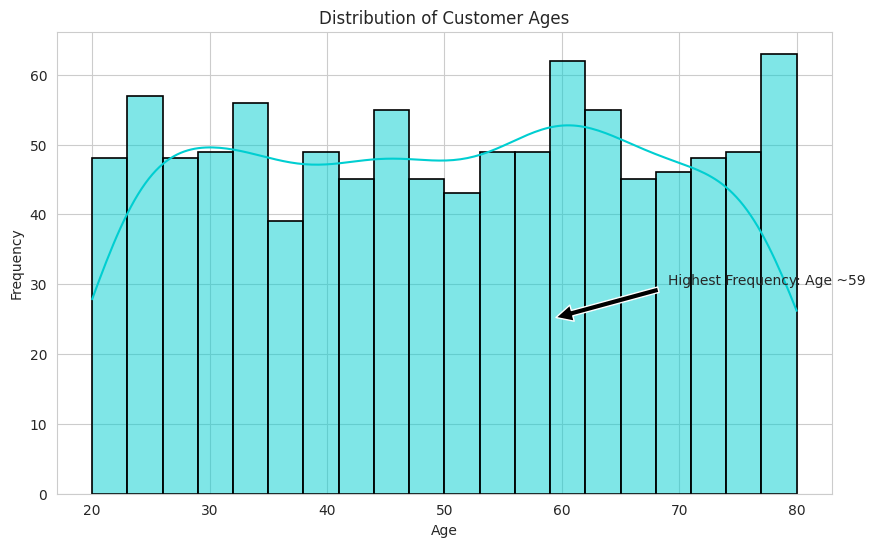

In [18]:
# Improve the color and detail of the histogram for customer age distribution
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['age'], bins=20, kde=True, color='darkturquoise', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Highlight the bin with the highest frequency, likely around the age of 60
# Find the bin containing age 60
bin_max = customers_df['age'].value_counts().idxmax()
max_count = customers_df['age'].value_counts().max()

# Annotate the plot with this information
plt.annotate(f'Highest Frequency: Age ~{bin_max}', xy=(bin_max, max_count), xytext=(bin_max+10, max_count+5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.show()

# Explanation for why the frequency for ages around 60 is the highest:
# The dataset likely reflects a customer base with a significant proportion of individuals in their late middle age. This could be due to several factors, such as the product range appealing particularly to this demographic, or perhaps this age group has more disposable income to spend on these products. Further analysis of purchase behaviors and preferences could provide more insights into this trend.
